<a href="https://colab.research.google.com/github/mr-rojit/pytorch-basics/blob/main/pytorch_02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
linear = make_regression(50,1, noise=10)
X, y = linear

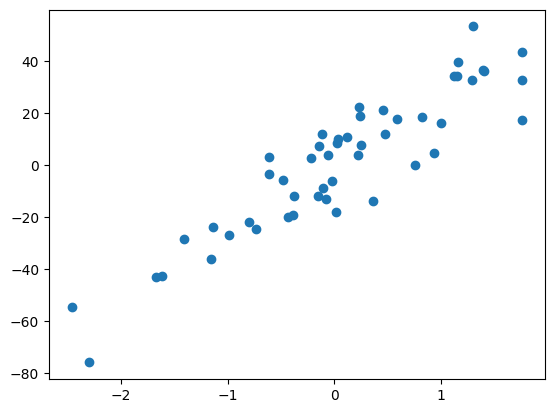

In [3]:
plt.scatter(X, y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64))

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weights * X + self.bias


In [57]:
torch.manual_seed(42)

lr = LinearRegression()
list(lr.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [67]:
with torch.inference_mode():
  y_pred = lr(X_test)

In [68]:
y_pred

tensor([[ 2.0434e-01],
        [ 3.5491e-04],
        [-3.4657e-02],
        [ 2.8965e-01],
        [ 8.9315e-02],
        [-6.4651e-01],
        [ 1.3520e-01],
        [ 1.0896e-01],
        [-3.4528e-01],
        [-1.4027e-01]], dtype=torch.float64)

In [69]:
y_test

array([  4.12920145, -11.77450519,  -5.75354954,  12.14966209,
        11.9910382 , -75.78552626, -18.02185702,   3.80910392,
       -28.1672206 , -21.70480524])

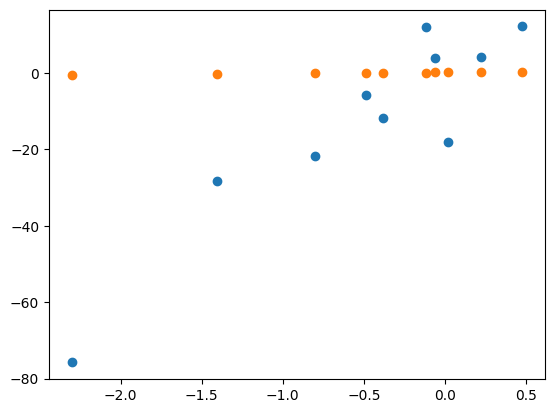

In [70]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

In [71]:
mae = nn.L1Loss()

sgd = torch.optim.SGD(params=lr.parameters(), lr=0.01)

In [79]:
# training loop
epochs = 50
for epoch in range(epochs):
  # set model for training
  lr.train()

  # make prediction using forward pass
  y_pred = lr(torch.from_numpy(X_train))

  # calculate loss
  loss = mae(y_pred, torch.from_numpy(y_train))


  sgd.zero_grad()

  loss.backward()

  sgd.step()

